learn how to handle dates using the datetime object in Python with pandas, using a dataset of daily temperature (maximum in Fahrenheit) and total precipitation (inches) in July 2018 for Boulder

## Import Packages and Get Data

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [8]:
boulder_july_2018 = pd.read_csv('C:/capes_sql/colorado-flood/downloads/july-2018-temperature-precip .csv')
## Downloading from https://ndownloader.figshare.com/files/12948515
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [9]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


In [11]:
#data types
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

# Plot Dates as Strings

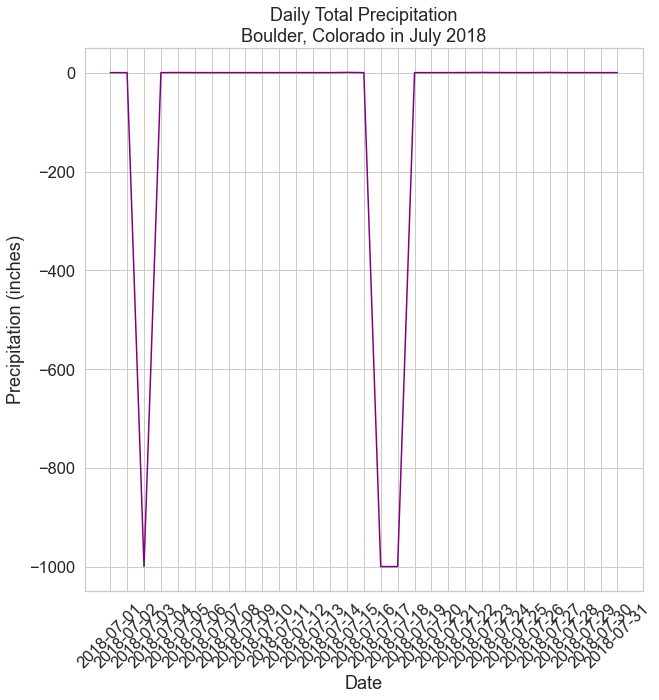

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018['date'],
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")
plt.xticks(rotation = 45)
plt.show()

 - there are many negative values in this dataset - these are actually “no data”
 - closely at the dates on the x-axis. When you plot a string field for the x-axis, Python gets stuck trying to plot the all of the date labels. 
 
 You can avoid this problem by converting the dates from strings to a datetime object during the import of data into a pandas dataframe. 

# Import Date Column into Pandas Dataframe As Datetime Object

### parse_dates parameter of the pd.read_csv()

#### parse_dates = ['date_column']

If you have a single column that contain dates in your data, you can also set dates as the index for the dataframe using the index_col parameter:

- index_col = ['date_column']


In [15]:
boulder_july_2018 = pd.read_csv('C:/capes_sql/colorado-flood/downloads/july-2018-temperature-precip .csv',
                                parse_dates=['date'],
                                index_col=['date'])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,-999.00
2018-07-04,87,0.00
2018-07-05,84,0.24


 column date to the type datetime and you also set the index of the dataframe as that datetime object.
 
  So rather than the index being the original RangeIndex of values from 0 to 31, the index is now a DatetimeIndex

In [17]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


In [18]:
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

# Plot Dates From Pandas Dataframe Using Datetime

In matplotlib, there are slight differences in how bar and scatter plots read in data versus how line plots read in data.

When plotting with ax.bar() and ax.scatter(), numpy is used to concatenate (a fancy word for combine) an array that has been created and passed in for the x-axis and/or y-axis data. However, numpy cannot concatenate the datetime object with other values.

Thus, if you try to pass a datetime column or index directly to ax.bar() or ax.scatter(), you will receive an error.

### Use Index Values Attribute to Plot Datetime

To avoid this error, you can call the attribute .values on the datetime index using:

df.index.values

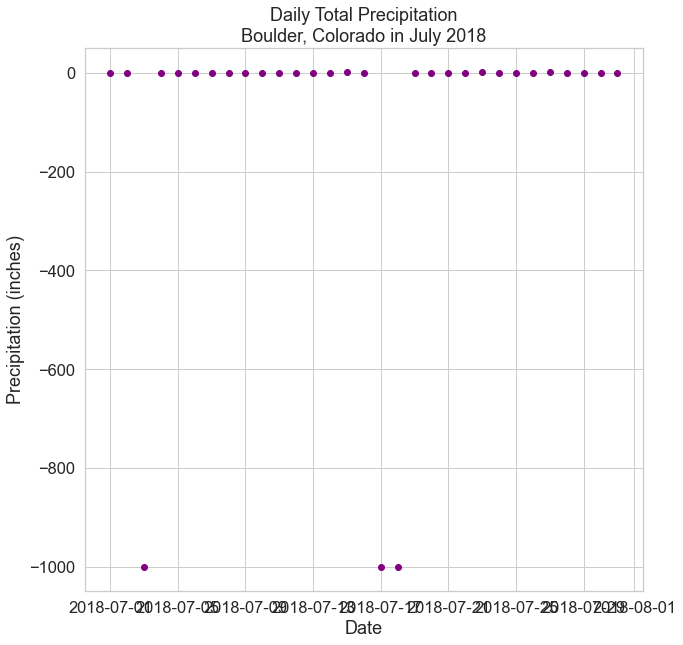

In [20]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,#dates
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

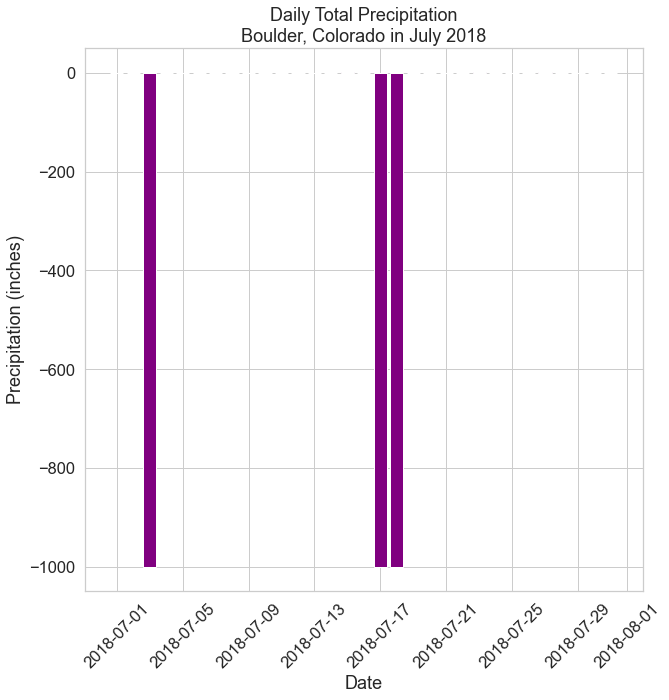

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Note: you do not need to use .values when using an index that contains float values, rather than datetime objects, nor when creating a line graph using ax.plot()

## Work With No Data Values in Pandas Dataframe

In [22]:
# Both min and mean are affected by these negative, no data values
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,31.000000
mean,88.129032,-96.618065
std,6.626925,300.256388
min,75.000000,-999.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.050000
max,97.000000,0.450000


In [24]:
# Import data using datetime and no data value
boulder_july_2018 = pd.read_csv('C:/capes_sql/colorado-flood/downloads/july-2018-temperature-precip .csv',
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values=[-999])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


In [25]:
# Both min and mean now accurately reflect the true data
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,28.000000
mean,88.129032,0.065714
std,6.626925,0.120936
min,75.000000,0.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.055000
max,97.000000,0.450000


Finally, plot the data one last time to see that the negative values -999 are no longer on the plot.

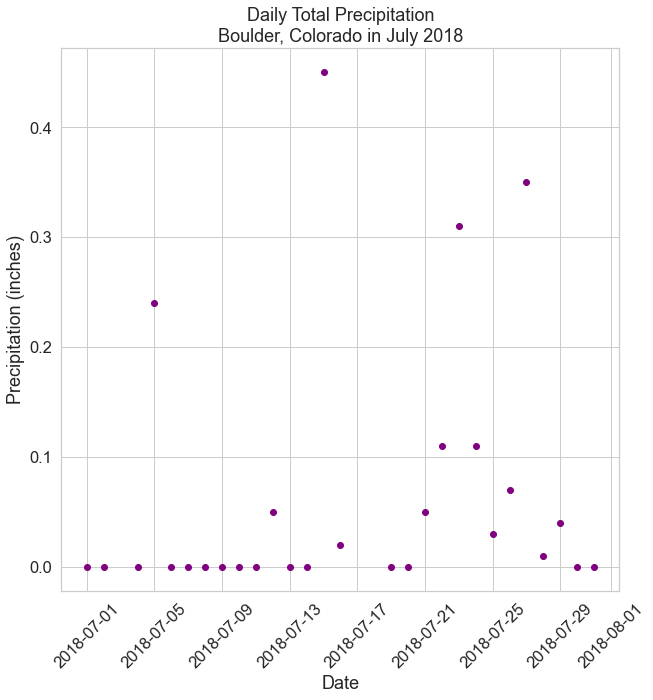

In [29]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

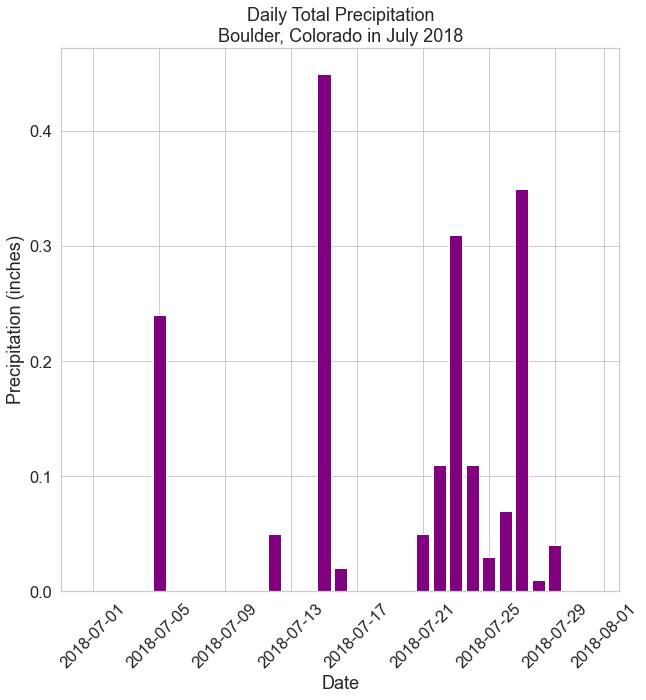

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

By using the na_values parameter, you told Python to ignore those “no data” values (which are now labeled as NaN) when it performs calculations on the data and when it plots the data.

Note: if there are multiple types of missing values in your dataset, you can add multiple values in the na_values parameter as follows:

- na_values=['NA', ' ', -999])